In [2]:
import numpy as np
import matplotlib.pyplot as plt
from makePop_while import *
from scipy.stats import gaussian_kde
import corner
from tqdm.notebook import tqdm

/home/thomas.callister/CBC/spin-monte-carlo/binary.py:18: RuntimeWarning: divide by zero encountered in true_divide
  g_e = np.power(ref_eccs,12./19.)*np.power(1.+(121./304.)*ref_eccs**2.,870./2299.)/(1.-ref_eccs**2.)
/home/thomas.callister/CBC/spin-monte-carlo/binary.py:21: RuntimeWarning: invalid value encountered in multiply
  ref_F_integrand = np.power(g_e,4.)*np.power(1.-ref_eccs**2.,5./2.)/(ref_eccs*(1.+(121./304.)*ref_eccs**2.))
/home/thomas.callister/CBC/spin-monte-carlo/binary.py:21: RuntimeWarning: invalid value encountered in true_divide
  ref_F_integrand = np.power(g_e,4.)*np.power(1.-ref_eccs**2.,5./2.)/(ref_eccs*(1.+(121./304.)*ref_eccs**2.))
/home/thomas.callister/CBC/spin-monte-carlo/binary.py:24: RuntimeWarning: divide by zero encountered in true_divide
  ref_F *= (48./19.)/np.power(g_e,4.)
/home/thomas.callister/CBC/spin-monte-carlo/binary.py:24: RuntimeWarning: invalid value encountered in multiply
  ref_F *= (48./19.)/np.power(g_e,4.)
/home/thomas.callister/CBC/spin

In [36]:
samps = np.load('emcee_samples_maxwellian_perfectAlignment.npy')

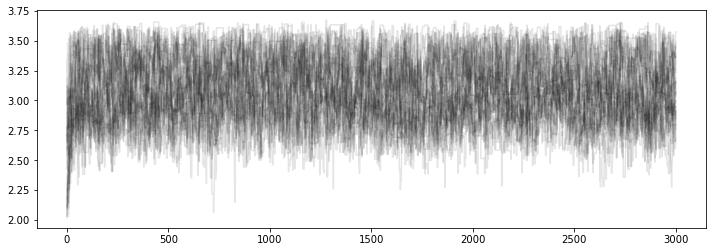

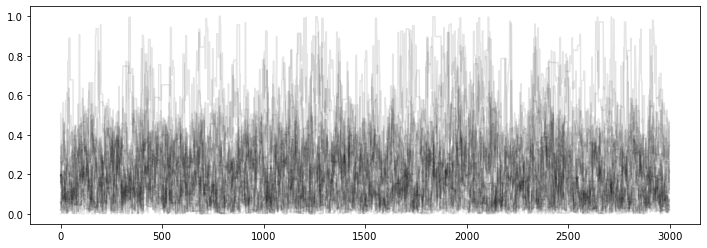

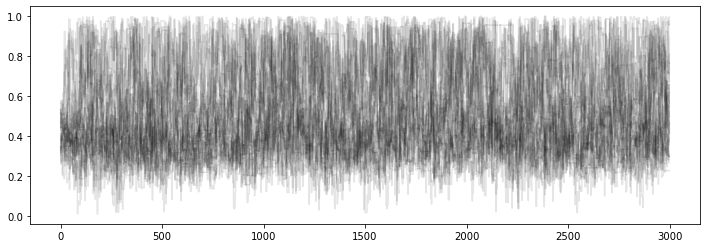

In [37]:
for j in range(3):
    fig,ax = plt.subplots(figsize=(12,4))
    for i in range(32):
        ax.plot(samps[i,:,j],alpha=0.1,color='black')
    plt.show()

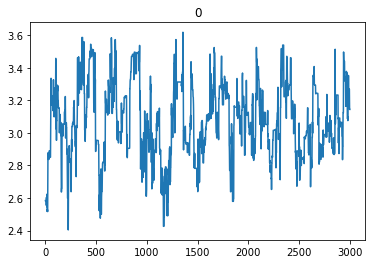

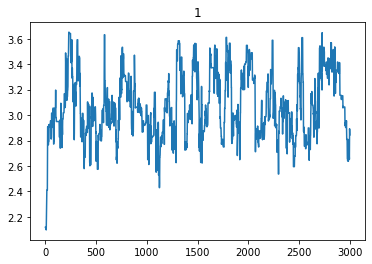

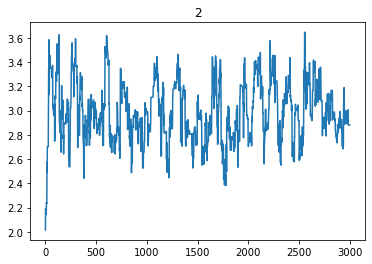

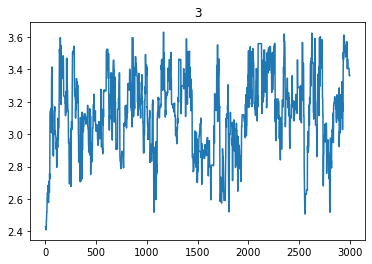

In [38]:
for i in range(4):
    plt.plot(samps[i,:,0])
    plt.title(i)
    plt.show()

In [41]:
collapsed_samps = np.load('processed_emcee_samples_maxwellian_perfectAlignment.npy')[()]

In [43]:
size=100
pops = np.zeros((collapsed_samps.shape[0],size))
pops_p = np.zeros((collapsed_samps.shape[0],size))

randomInds = np.random.choice(np.arange(collapsed_samps.shape[0]),size=400,replace=False)
for i,samp in tqdm(enumerate(collapsed_samps[randomInds,:]),total=400):
    
    """
    try:
        binaries = getPopRecursion(size,1.,samp[1],samp[2],10.*np.pi/180.,"maxwellian",[10.**samp[0],10.**samp[0]])
        #binaries = getPopRecursion(size,1.,samp[3],samp[4],0.1,"polar_maxwellian",[10.**samp[0],10.**samp[1],10.**samp[2]])
    except RecursionError:
        print(samp)
        continue
    """
    binaries,t,sn,m,efficient = getPopRecursion(size,1.,samp[1],samp[2],0.,"maxwellian",[10.**samp[0],10.**samp[0]],1.,efficiencyThreshold=1e-4)
    if efficient==False:
        print(samp)
        break
    
    chi_effectives = np.array([b.chi_effective() for b in binaries[:size]])
    chi_ps = np.array([b.chi_p() for b in binaries[:size]])
    pops[i,:] = chi_effectives
    pops_p[i,:] = chi_ps

/home/thomas.callister/CBC/spin-monte-carlo/makePop_while.py:121: RuntimeWarning: divide by zero encountered in double_scalars
  successful = ((survived==1)*(mergerTimes<1))


In [13]:
import json
with open("/home/thomas.callister/Simona/o3a-spin-studies/Postprocessing/gaussian-spin-xeff-xp-ppd-data.json","r") as jf:
    gaussian_data = json.load(jf)

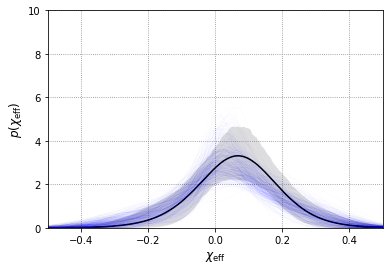

In [44]:
fig,ax = plt.subplots()

ax.fill_between(gaussian_data['chi_eff_grid'],np.quantile(np.array(gaussian_data['chi_eff_pdfs']),0.05,axis=0),\
                np.quantile(np.array(gaussian_data['chi_eff_pdfs']),0.95,axis=0),facecolor='lightgrey',alpha=0.75,zorder=-1)
ax.plot(gaussian_data['chi_eff_grid'],np.mean(np.array(gaussian_data['chi_eff_pdfs']),axis=0),color='black')

grid = np.linspace(-1,1,200)
for pop in pops:
    
    if np.any(pop!=0.):
        kde = gaussian_kde(pop)
        ax.plot(grid,kde(grid),color='blue',lw=0.1,alpha=0.1)

ax.set_xlim(-0.5,0.5)
ax.set_ylim(0,10)
ax.xaxis.grid(True,which='major',ls=':',color='grey')
ax.yaxis.grid(True,which='major',ls=':',color='grey')

ax.set_xlabel(r"$\chi_\mathrm{eff}$",fontsize=12)
ax.set_ylabel(r"$p(\chi_\mathrm{eff})$",fontsize=12)

plt.show()

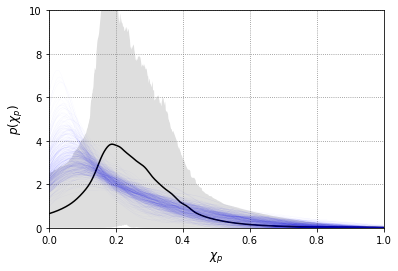

In [45]:
fig,ax = plt.subplots()

ax.fill_between(gaussian_data['chi_p_grid'],np.quantile(np.array(gaussian_data['chi_p_pdfs']),0.05,axis=0),\
                np.quantile(np.array(gaussian_data['chi_p_pdfs']),0.95,axis=0),facecolor='lightgrey',alpha=0.75,zorder=-1)
ax.plot(gaussian_data['chi_p_grid'],np.mean(np.array(gaussian_data['chi_p_pdfs']),axis=0),color='black')

grid = np.linspace(0,1,200)
for pop in pops_p:
    
    if np.any(pop!=0.):    
        kde = gaussian_kde(pop)
        ax.plot(grid,kde(grid)/np.trapz(kde(grid),grid),color='blue',lw=0.1,alpha=0.1)

ax.set_xlim(0,1)
ax.set_ylim(0,10)
ax.xaxis.grid(True,which='major',ls=':',color='grey')
ax.yaxis.grid(True,which='major',ls=':',color='grey')

ax.set_xlabel(r"$\chi_p$",fontsize=12)
ax.set_ylabel(r"$p(\chi_p)$",fontsize=12)

plt.show()

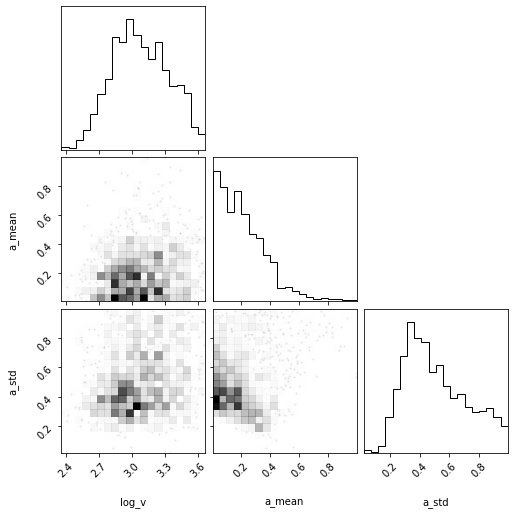

In [42]:
#labels=["sigma_v","v_perp","sigma_perp","a_mean","a_std"]
labels=["log_v","a_mean","a_std"]
#labels=["logR","v_parallel","v_perp","a_mean","a_std"]
#labels=["logR_min","delta logR","sigma_v","a_mean","a_std"]
corner.corner(collapsed_samps,plot_contours=False,labels=labels)
plt.show()

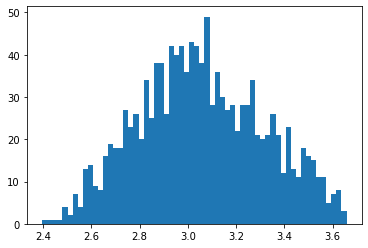

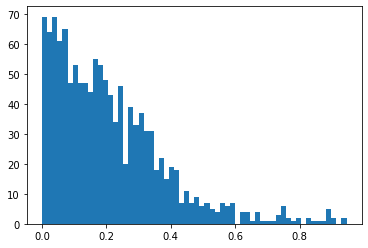

In [7]:
plt.hist(collapsed_samps[:,0],bins=60)
plt.show()
plt.hist(collapsed_samps[:,1],bins=60)
plt.show()

In [25]:
print(10.**np.quantile(collapsed_samps[:,0],0.05),10.**np.quantile(collapsed_samps[:,1],0.05))

99.21231426402304 209.300730265694


In [14]:
v_50 = np.quantile(collapsed_samps[:,0],0.5)
v_05 = np.quantile(collapsed_samps[:,0],0.05)
v_95 = np.quantile(collapsed_samps[:,0],0.95)
print(10.**v_50,10.**v_95-10.**v_50,10.**v_50-10.**v_05)

729.9207177889795 1396.1541238961577 477.3991356150028


In [15]:
v_50 = np.quantile(collapsed_samps[:,1],0.5)
v_05 = np.quantile(collapsed_samps[:,1],0.05)
v_95 = np.quantile(collapsed_samps[:,1],0.95)
print(10.**v_50,10.**v_95-10.**v_50,10.**v_50-10.**v_05)

2987.624893565502 10469.277845922967 2499.0493290845334


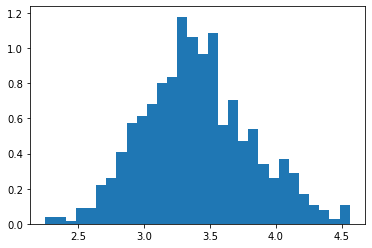

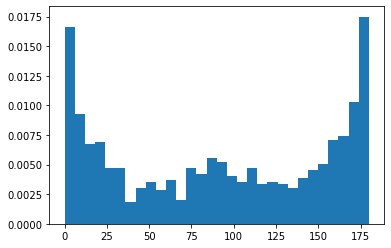

In [35]:
v_tot = np.zeros(len(collapsed_samps))
angle = np.zeros(len(collapsed_samps))

for i,samp in enumerate(collapsed_samps):   
    vx,vy,vz = random_kick(10.**samp[0],10.**samp[1])
    v_tot[i] = np.sqrt(vx**2.+vy**2.+vz**2.)
    angle[i] = np.arctan2(np.sqrt(vx**2.+vy**2.),vz)
    
plt.hist(np.log10(v_tot),bins=30,density=True)
plt.show()

plt.hist(angle*180./np.pi,bins=30,density=True)
plt.show()

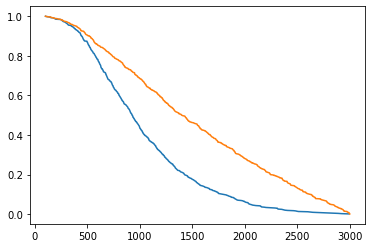

In [313]:
plt.plot(np.sort(collapsed_samps[:,1]),np.cumsum(np.ones(collapsed_samps[:,1].size))[::-1]/float(collapsed_samps[:,1].size))
plt.plot(np.sort(collapsed_samps[:,2]),np.cumsum(np.ones(collapsed_samps[:,2].size))[::-1]/float(collapsed_samps[:,2].size))
#plt.yscale('log')
plt.show()

In [76]:
binaries = getPopRecursion(1.,0.5,0.5,0.1,"directed",[np.log10(1000),np.log10(1500)])
m1 = np.array([b.m1 for b in binaries])
m2 = np.array([b.m2 for b in binaries])

TypeError: getPopRecursion() takes 8 positional arguments but 9 were given

In [85]:
mMin = 5.
mMax = 50.
alpha = -2.3
bq = 4.
n=1000
m1_test = np.power((mMax**(1.+alpha)-mMin**(1.+alpha))*np.random.random(n) + mMin**(1.+alpha),1./(1.+alpha))
m2_test = np.power((m1_test**(1.+bq)-mMin**(1.+bq))*np.random.random(n)+mMin**(1.+bq),1./(1.+bq))

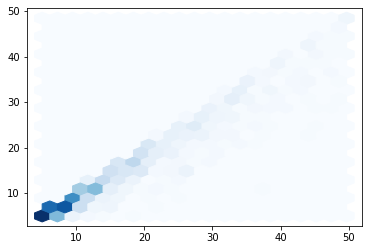

In [88]:
plt.hexbin(m1,m2,gridsize=20,cmap='Blues')

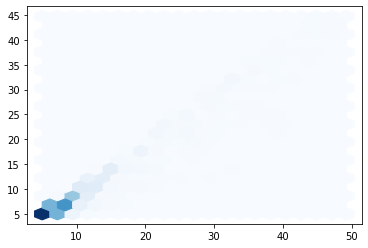

In [87]:
plt.hexbin(m1_test,m2_test,gridsize=20,cmap='Blues')

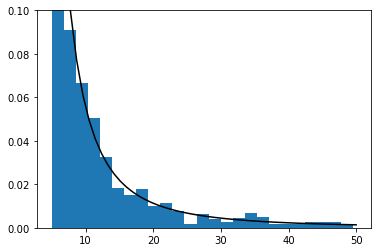

In [83]:
plt.hist(m1_test,bins=25,density=True)

xs = np.linspace(5,50)
a = -2.3
ys = (1+a)*xs**a/(50**(1.+a)-5.**(1+a))
plt.plot(xs,ys,color='black')
plt.ylim(0,0.1)

plt.show()

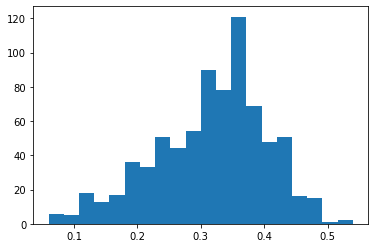

In [11]:
plt.hist(fracNegative,bins=20)
plt.show()

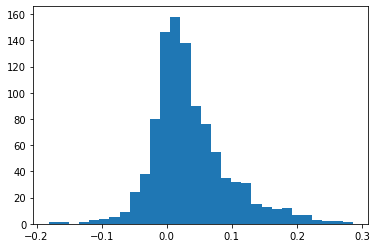

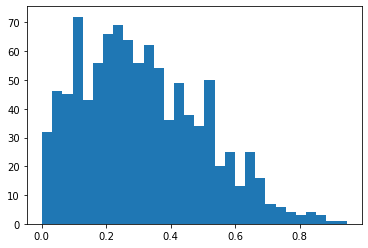

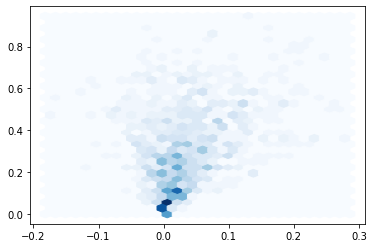

In [8]:
binaries = getPopRecursion(1000,1.2,0.4,0.3,0.,"directed",[np.log10(1000),np.log10(1500)])

chi_effectives = np.array([b.chi_effective() for b in binaries])
chi_ps = np.array([b.chi_p() for b in binaries])
masses = np.array([b.m1+b.m2 for b in binaries])
qs = np.array([b.m2/b.m1 for b in binaries])
plt.hist(chi_effectives,bins=30)
plt.show()
plt.hist(chi_ps,bins=30)
plt.show()
plt.hexbin(chi_effectives,chi_ps,gridsize=30,cmap='Blues')
plt.show()

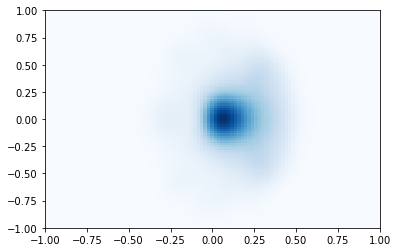

In [22]:
test = gaussian_kde([np.concatenate([chi_effectives,chi_effectives]),np.concatenate([chi_ps,-chi_ps])])

xs = np.linspace(-1,1,100)
ys = np.linspace(-1,1,95)
Xs,Ys = np.meshgrid(xs,ys)
zs = test([Xs.reshape(-1),Ys.reshape(-1)]).reshape((ys.size,xs.size))

plt.pcolormesh(xs,ys,zs,cmap='Blues')

In [14]:
plt.hexbin(chi_effectives,masses,gridsize=30,cmap='Blues')
plt.show()
plt.hexbin(chi_ps,masses,gridsize=30,cmap='Blues')
plt.show()

NameError: name 'masses' is not defined

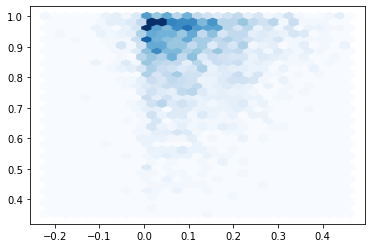

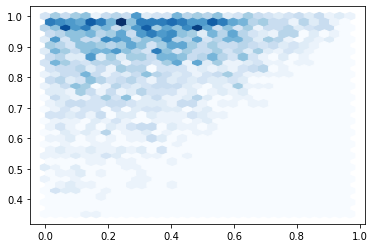

In [105]:
plt.hexbin(chi_effectives,qs,gridsize=30,cmap='Blues')
plt.show()
plt.hexbin(chi_ps,qs,gridsize=30,cmap='Blues')
plt.show()

(-0.75, 0.75)

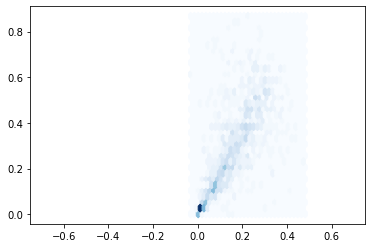

In [200]:
binaries = getPopRecursion(1000,0.,2000.,3.,10.,0.5,0.5,0.3)
chi_effectives = np.array([b.chi_effective() for b in binaries])
chi_ps = np.array([b.chi_p() for b in binaries])

kde_2d = gaussian_kde([chi_effectives,chi_ps])
plt.hexbin(chi_effectives,chi_ps,gridsize=30,cmap='Blues')
plt.xlim(-0.75,0.75)

In [201]:
xs=np.linspace(-1,1,200)
ys=np.linspace(0,1,190)
Xs,Ys = np.meshgrid(xs,ys)
Zs = kde_2d([Xs.reshape(-1),Ys.reshape(-1)]).reshape(Xs.shape)

(-0.75, 0.75)

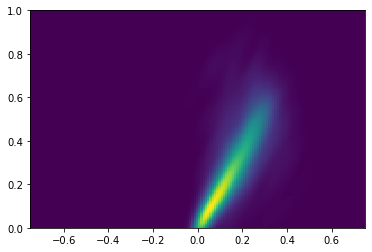

In [202]:
plt.pcolormesh(xs,ys,Zs)
plt.xlim(-0.75,0.75)

In [354]:
5.*np.log10(2.6/10.)

-2.92513326014591

In [345]:
1./0.379*3.086e16/1.5e11

542832.0140721196

In [341]:
33.6*0.52/0.379

46.10026385224275